# Entropy 기반 기준은 어떻게 세워지는 것인가?

In [1]:
# Re-import necessary libraries and define functions after reset
import numpy as np
from math import log2

# Define the entropy function
def entropy(class_labels):
    total_count = len(class_labels)

    # 각 요소의 발생 횟수 계산
    value_counts = np.bincount(class_labels)

    probabilities = value_counts / total_count

    entropy_value = -np.sum([p * log2(p) for p in probabilities if p > 0])

    return entropy_value

In [2]:
def split_entropy(b_values, class_labels, threshold):
    # 임계값을 기준으로 데이터를 일단 나눔
    left_split = class_labels[b_values < threshold]   # 넘파이 개사기
    right_split = class_labels[b_values >= threshold]

    # 각각의 엔트로피 계산
    left_entropy = entropy(left_split)
    right_entropy = entropy(right_split)

    # 엔트로피 합 구하기 -> 이 때, 비중 차이를 둔다.
    total_count = len(class_labels)
    left_weight = len(left_split) / total_count
    right_weight = len(right_split) / total_count

    split_entropy_value = (left_weight * left_entropy) + (right_weight * right_entropy)

    return split_entropy_value

3.5 0.6041843979966417


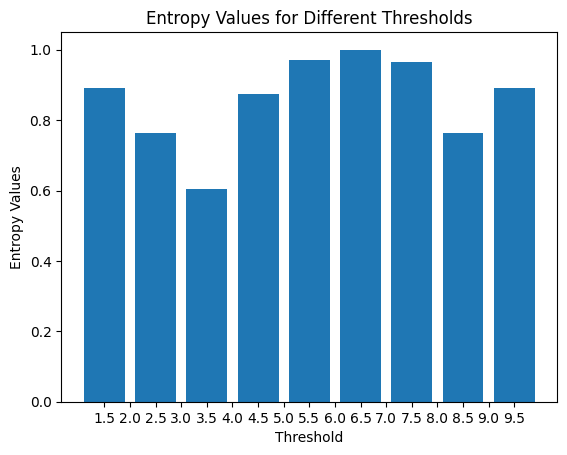

In [3]:
import matplotlib.pyplot as plt

# 분류하고자 하는 데이터 B와 이들의 클래스 목록
B = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
C = np.array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1])

# 각 원소들의 중간 값 계산 -> 임계치용
thresholds = (B[:-1] + B[1:]) / 2     # 넘파이 개사기 2

entropy_values = [split_entropy(B, C, t) for t in thresholds]

best_threshold_index = np.argmin(entropy_values)
best_threshold = thresholds[best_threshold_index]
best_entropy = entropy_values[best_threshold_index]

print(best_threshold, best_entropy)

plt.bar(thresholds, entropy_values)
plt.xlabel('Threshold')
plt.ylabel('Entropy Values')
plt.title('Entropy Values for Different Thresholds')
plt.xticks(np.arange(min(thresholds), max(thresholds)+0.5, 0.5))
plt.show()

# 정말 그럴까? sklearn으로 decision tree를 만들어보자!

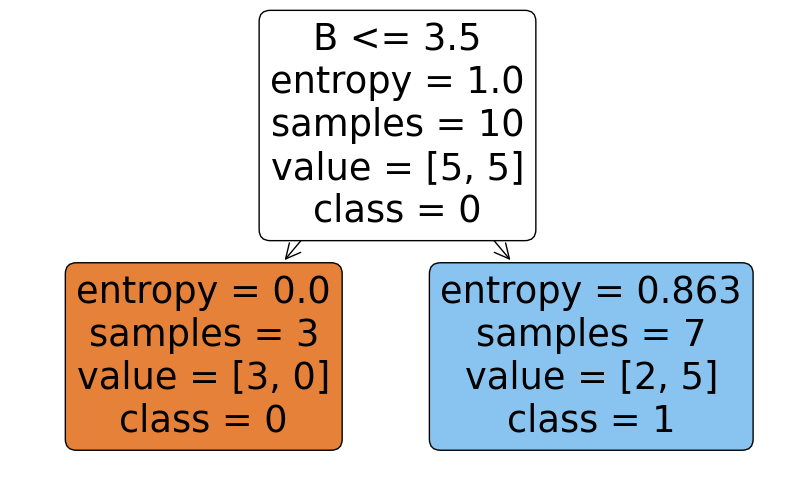

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree

B = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
C = np.array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1])

"""
params
  :criterion: 기준을 만드는 방식을 결정한다. 'gini'도 사용 가능
  :max_depth: 트리의 최대 깊이를 명시한다.
  :random_state: 랜덤 시드를 명시한다.
"""
clf = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=42)
clf.fit(B, C)

plt.figure(figsize=(10, 6))
tree.plot_tree(clf, filled=True, feature_names=['B'], class_names=['0', '1'], rounded=True)
plt.show()